<a href="https://colab.research.google.com/github/SurajLahariya/DS_learning/blob/main/Assignment_17_(_Support_Vector_Machines)_SalaryData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
import pandas as pd

In [2]:
url1 = 'https://raw.githubusercontent.com/SurajLahariya/DS_learning/main/SalaryData_Train(1).csv'

In [3]:
url2 = 'https://raw.githubusercontent.com/SurajLahariya/DS_learning/main/SalaryData_Test(1).csv'

In [4]:
df_train = pd.read_csv(url1)

In [5]:
df_test = pd.read_csv(url2)

###EDA

In [6]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [53]:
df_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [54]:
df_train.describe(include=['O'])

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
count,30161,30161,30161,30161,30161,30161,30161,30161,30161
unique,7,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22285,9840,14065,4038,12463,25932,20380,27504,22653


In [55]:
df_train['native'].nunique()

40

In [56]:
print(df_train.shape)
print(df_test.shape)

(30161, 14)
(15060, 14)


##Visualizaing the data

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

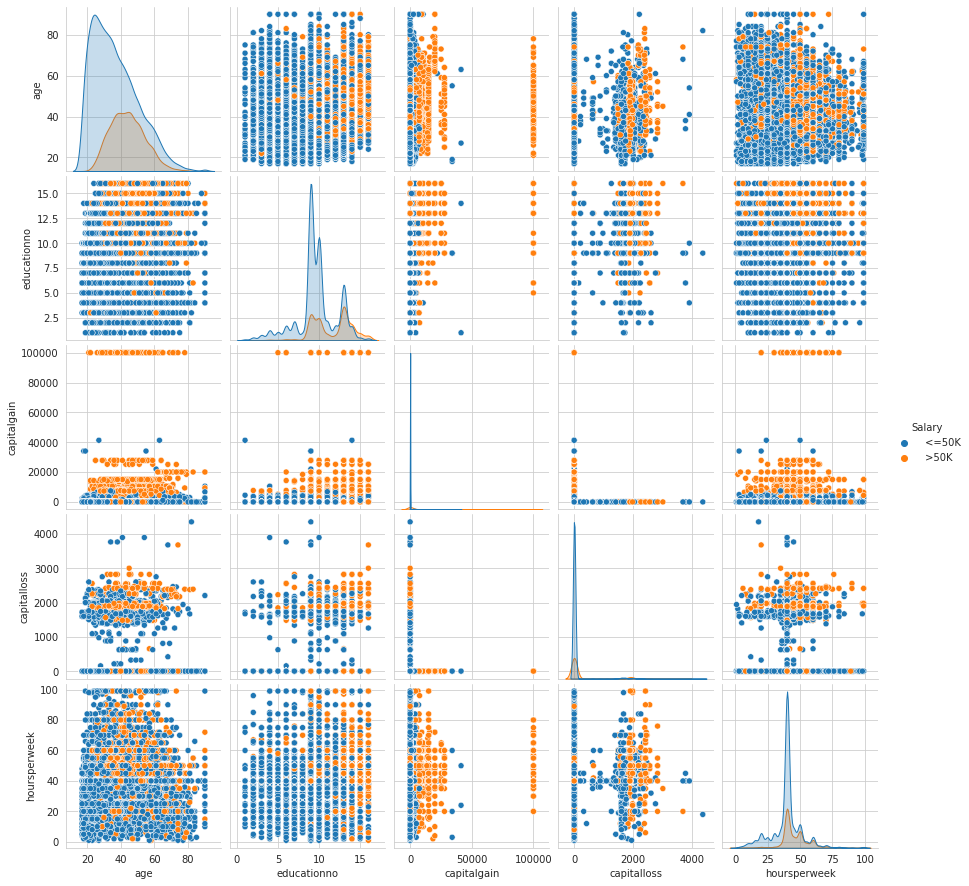

In [15]:
sns.pairplot(df_train, hue = 'Salary')

In [57]:
# Salary count is not balanced
df_train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

##Split up the data

In [58]:
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

In [59]:
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

In [60]:
print(X.shape)
print(y.shape)

(30161, 13)
(30161,)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Before SMOTE')

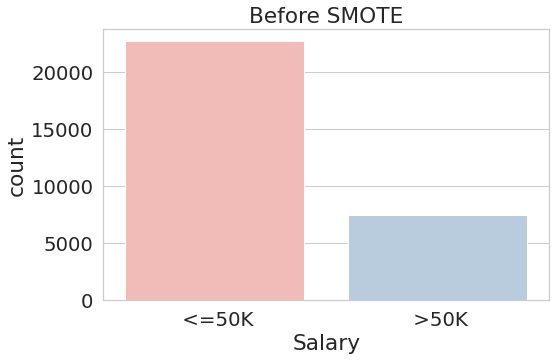

In [61]:
sns.set(style = 'whitegrid', font_scale = 1.8)
plt.subplots(figsize = (8,5))
sns.countplot(df_train['Salary'], palette = 'Pastel1').set_title('Before SMOTE')

##Using Column trasfer to treat object columns

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder

In [63]:
cat_cols = [col for col in X.columns if X[col].dtype == 'object']
cat_cols

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [64]:
num_cols = [col for col in X.columns if X[col].dtype != 'object']
num_cols

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [65]:
ct = ColumnTransformer([
    ('RB', StandardScaler(), num_cols),
    ('OHE', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['workclass', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native'] )
], remainder = 'drop')

In [66]:
ct.fit(X)

ColumnTransformer(transformers=[('RB', StandardScaler(),
                                 ['age', 'educationno', 'capitalgain',
                                  'capitalloss', 'hoursperweek']),
                                ('OHE',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['workclass', 'maritalstatus', 'occupation',
                                  'relationship', 'race', 'sex', 'native'])])

In [67]:
ct.transform(X)

array([[ 0.04277892,  1.12889813,  0.14608503, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.88026081,  1.12889813, -0.14744712, ...,  1.        ,
         0.        ,  0.        ],
       [-0.0333558 , -0.4397325 , -0.14744712, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.48933854, -0.4397325 , -0.14744712, ...,  1.        ,
         0.        ,  0.        ],
       [-1.25151126, -0.4397325 , -0.14744712, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.03253024, -0.4397325 ,  1.88108414, ...,  1.        ,
         0.        ,  0.        ]])

In [95]:
XTest = pd.DataFrame(ct.transform(X_test))

In [69]:
X = pd.DataFrame(ct.transform(X))
X

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.042779,1.128898,0.146085,-0.218508,-0.077735,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.880261,1.128898,-0.147447,-0.218508,-2.331495,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.033356,-0.439733,-0.147447,-0.218508,-0.077735,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.108665,-1.224048,-0.147447,-0.218508,-0.077735,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.794703,1.128898,-0.147447,-0.218508,-0.077735,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.870838,0.736740,-0.147447,-0.218508,-0.244681,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30157,0.118914,-0.439733,-0.147447,-0.218508,-0.077735,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30158,1.489339,-0.439733,-0.147447,-0.218508,-0.077735,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30159,-1.251511,-0.439733,-0.147447,-0.218508,-1.747187,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [99]:
#under-sampling
import imblearn
from imblearn.over_sampling import SMOTE

In [81]:
from imblearn.under_sampling import RandomUnderSampler

In [82]:
sm = RandomUnderSampler(random_state=40)
X_res, y_res = sm.fit_resample(X, y)

In [83]:
y_res_df = pd.DataFrame(y_res)
y_res_df.head()

,Salary
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Before SMOTE')

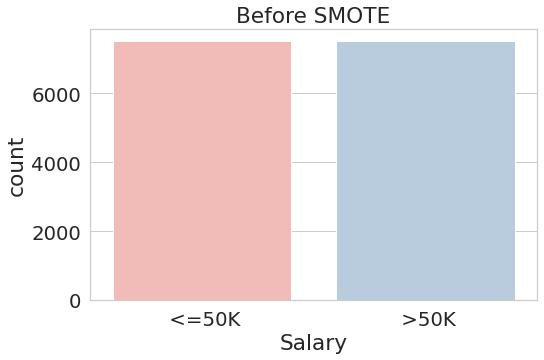

In [84]:
sns.set(style = 'whitegrid', font_scale = 1.8)
plt.subplots(figsize = (8,5))
sns.countplot(y_res_df['Salary'], palette = 'Pastel1').set_title('Before SMOTE')

In [85]:
print(X_res.shape)
print(y_res.shape)

(15016, 86)
(15016,)


## SVC model

In [100]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [92]:
SVCmodel = SVC(C= 1.0, kernel = 'linear', gamma= "auto",)

In [93]:
SVCmodel.fit(X_res,y_res)

SVC(gamma='auto', kernel='linear')

In [96]:
accuracy_score(y_test, SVCmodel.predict(XTest))

0.7978751660026561

In [98]:
confusion_matrix(y_test, SVCmodel.predict(XTest))

array([[8859, 2501],
       [ 543, 3157]])

In [101]:
y_prd = SVCmodel.predict(XTest)

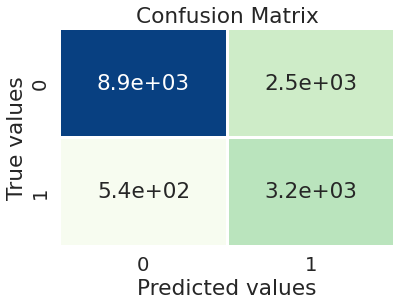

In [103]:
sns.heatmap(confusion_matrix(y_test, y_prd), annot = True, lw = 2, cbar = False, cmap = 'GnBu')
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.title('Confusion Matrix')
plt.show()

## Using Grid Search CV

In [113]:
param = {
    'kernel' : ['linear', 'rbf'],
    'C' : np.arange(1,5,1),
    'gamma' : ['scale', 'auto']
}

In [114]:
model = SVC()

In [115]:
gs=GridSearchCV(estimator=model, param_grid= param, cv=5, n_jobs=-1).fit(X_res,y_res)

In [116]:
gs.best_estimator_

SVC(C=2)

In [117]:
gs.best_params_

{'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [119]:
SVC_tuned = gs.best_estimator_.fit(X_res,y_res)
y_pred = SVC_tuned.predict(XTest)
SVC_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score for SVC: {}'.format(SVC_accuracy))

Accuracy score for SVC: 0.8038512616201859
